<a href="https://colab.research.google.com/github/anilkamat/VAE/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👖 Autoencoders on Fashion MNIST

In this notebook, we'll walk through the steps required to train your own autoencoder on the fashion MNIST dataset.

In [ ]:
!pip install pillow_heif

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.1 MB/s eta 0:00:00


In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, datasets, callbacks
import tensorflow.keras.backend as K

import pillow_heif
import os

In [ ]:
def display(images, n=10, m=1):
  fig=plt.figure()
  fig.set_figheight(15)
  fig.set_figwidth(15)
  for i in range(n):
      plt.subplot(m, n, i+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(images[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 0. Parameters <a name="parameters"></a>

In [ ]:
IMAGE_SIZE = 32
CHANNELS = 3
BATCH_SIZE = 100
BUFFER_SIZE = 1000
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 2
EPOCHS = 50

## 1. Prepare the data <a name="prepare"></a>

In [ ]:
# Load the data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [ ]:
filepath = "/content/drive/My Drive/Computational Creativity/DATA ECSE 6965/"
images = []

# Convert Files from HEIC/JPG to PNG
for filename in os.listdir(filepath):
    print(filename)
    if (filename.endswith("heic") or filename.endswith("HEIC")) and pillow_heif.is_supported(filepath+filename):
        heif_file = pillow_heif.open_heif(filepath+filename)
        img = np.asarray(heif_file)
    else:
        img = plt.imread(filepath+filename)
    filename = filename.replace(".HEIC", ".png")
    filename = filename.replace(".heic", ".png")
    filename = filename.replace(".jpg", ".png")
    filename = filename.replace(".jpeg", ".png")
    plt.imsave(filepath+filename, img)




IMG_9433.HEIC
IMG_9506.HEIC
IMG_9435.HEIC
IMG_9426.HEIC
IMG_9428.HEIC
IMG_9431.HEIC
IMG_9453.HEIC
IMG_9539.HEIC
IMG_9497.HEIC
IMG_9541.HEIC
IMG_9310.HEIC
IMG_9511.HEIC
IMG_9507.HEIC
IMG_9430.HEIC
IMG_9429.HEIC
IMG_9439.HEIC
IMG_9466.HEIC
IMG_9544.HEIC
IMG_9308.HEIC
IMG_9288.HEIC
IMG_9538.HEIC
IMG_9432.HEIC
IMG_9360.HEIC
IMG_9354.HEIC
IMG_9414.HEIC
IMG_9440.HEIC
IMG_9478.HEIC
IMG_9495.HEIC
IMG_9545.HEIC
IMG_9500.HEIC
IMG_9349.HEIC
IMG_9499.HEIC
IMG_9451.HEIC
IMG_9508.HEIC
IMG_9450.HEIC
IMG_9422.HEIC
IMG_9498.HEIC
IMG_9473.HEIC
IMG_9492.HEIC
IMG_9386.HEIC
IMG_9406.HEIC
IMG_9404.HEIC
IMG_9352.HEIC
IMG_9412.HEIC
IMG_9361.HEIC
IMG_9413.HEIC
IMG_9540.HEIC
IMG_9353.HEIC
IMG_9436.HEIC
IMG_3501.heic
IMG_3502.heic
IMG_3503.heic
IMG_3505.heic
IMG_3506.heic
IMG_3507.heic
IMG_3508.heic
IMG_3509.heic
IMG_3510.heic
IMG_3511.heic
IMG_3512.heic
IMG_3514.heic
IMG_3515.heic
IMG_3516.heic
IMG_3517.heic
IMG_3518.heic
IMG_3519.heic
IMG_3520.heic
IMG_3521.heic
IMG_3522.heic
IMG_3523.heic
IMG_3524.heic
IMG_35

In [ ]:
!mkdir "/content/drive/My Drive/Computational Creativity/DATA ECSE 6965/PNG"

In [ ]:
filepath = "/content/drive/My Drive/Computational Creativity/DATA ECSE 6965/"
images = []
for filename in os.listdir(filepath):
    print(filename)
    if filename.endswith(".png"):
        os.rename(filepath+filename, filepath+"/PNG/"+filename)




IMG_9433.HEIC
IMG_9506.HEIC
IMG_9435.HEIC
IMG_9426.HEIC
IMG_9428.HEIC
IMG_9431.HEIC
IMG_9453.HEIC
IMG_9539.HEIC
IMG_9497.HEIC
IMG_9541.HEIC
IMG_9310.HEIC
IMG_9511.HEIC
IMG_9507.HEIC
IMG_9430.HEIC
IMG_9429.HEIC
IMG_9439.HEIC
IMG_9466.HEIC
IMG_9544.HEIC
IMG_9308.HEIC
IMG_9288.HEIC
IMG_9538.HEIC
IMG_9432.HEIC
IMG_9360.HEIC
IMG_9354.HEIC
IMG_9414.HEIC
IMG_9440.HEIC
IMG_9478.HEIC
IMG_9495.HEIC
IMG_9545.HEIC
IMG_9500.HEIC
IMG_9349.HEIC
IMG_9499.HEIC
IMG_9451.HEIC
IMG_9508.HEIC
IMG_9450.HEIC
IMG_9422.HEIC
IMG_9498.HEIC
IMG_9473.HEIC
IMG_9492.HEIC
IMG_9386.HEIC
IMG_9406.HEIC
IMG_9404.HEIC
IMG_9352.HEIC
IMG_9412.HEIC
IMG_9361.HEIC
IMG_9413.HEIC
IMG_9540.HEIC
IMG_9353.HEIC
IMG_9436.HEIC
IMG_3501.heic
IMG_3502.heic
IMG_3503.heic
IMG_3505.heic
IMG_3506.heic
IMG_3507.heic
IMG_3508.heic
IMG_3509.heic
IMG_3510.heic
IMG_3511.heic
IMG_3512.heic
IMG_3514.heic
IMG_3515.heic
IMG_3516.heic
IMG_3517.heic
IMG_3518.heic
IMG_3519.heic
IMG_3520.heic
IMG_3521.heic
IMG_3522.heic
IMG_3523.heic
IMG_3524.heic
IMG_35

In [ ]:
filepath = "/content/drive/My Drive/Computational Creativity/DATA ECSE 6965/"
images = []
for filename in os.listdir(filepath):
    print(filename)
    img = plt.imread(filepath+filename)
    img = img[::img.shape[0]//IMAGE_SIZE+1, ::img.shape[1]//IMAGE_SIZE+1]
    images.append(img.copy())




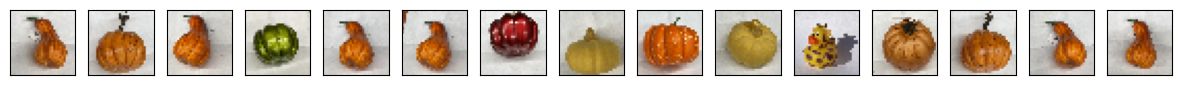

In [ ]:
display(images, 15)

In [ ]:
np_images = np.asarray(images)

In [ ]:
plt.imsave()

In [ ]:
print(len(np_images))

537


In [ ]:
x_train = np_images[0:450]
x_test = np_images[450:537]

In [ ]:
print(x_train.shape)
print(x_test.shape)

(450, 32, 32, 3)
(87, 32, 32, 3)


In [ ]:
# Preprocess the data


def preprocess(imgs):
    """
    Normalize and reshape the images
    """
    imgs = imgs.astype("float32") / 255.0
    # imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2), (0,0)), constant_values=0.0)
    # imgs = np.expand_dims(imgs, -1)
    return imgs


x_train = preprocess(x_train)
x_test = preprocess(x_test)

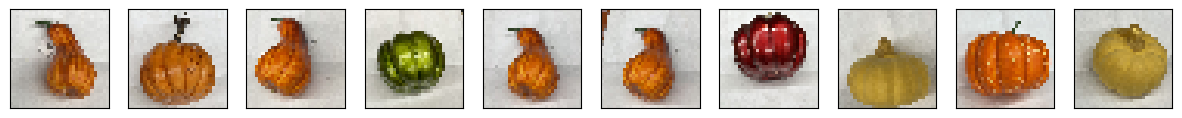

In [ ]:
# Show some items of clothing from the training set
display(x_train, 10)

## 2. Build the autoencoder <a name="build"></a>

In [ ]:
# Encoder
encoder_input = layers.Input(
    shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), name="encoder_input"
)
x = layers.Conv2D(32, (3, 3), strides=2, activation="relu", padding="same")(
    encoder_input
)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation="relu", padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]  # the decoder will need this!

x = layers.Flatten()(x)
encoder_output = layers.Dense(EMBEDDING_DIM, name="encoder_output")(x)

encoder = models.Model(encoder_input, encoder_output)
encoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 encoder_output (Dense)      (None, 2)                 4098      
                                                                 
Total params: 97346 (380.26 KB)
Trainable params: 97346 (3

In [ ]:
# Decoder
decoder_input = layers.Input(shape=(EMBEDDING_DIM,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(
    128, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    64, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    32, (3, 3), strides=2, activation="relu", padding="same"
)(x)
decoder_output = layers.Conv2D(
    CHANNELS,
    (3, 3),
    strides=1,
    activation="sigmoid",
    padding="same",
    name="decoder_output",
)(x)

decoder = models.Model(decoder_input, decoder_output)
decoder.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 dense_5 (Dense)             (None, 2048)              6144      
                                                                 
 reshape_5 (Reshape)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose_15 (Conv2  (None, 8, 8, 128)         147584    
 DTranspose)                                                     
                                                                 
 conv2d_transpose_16 (Conv2  (None, 16, 16, 64)        73792     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_17 (Conv2  (None, 32, 32, 32)        184

In [ ]:
# Autoencoder
autoencoder = models.Model(
    encoder_input, decoder(encoder_output)
)  # decoder(encoder_output)
autoencoder.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 encoder_output (Dense)      (None, 2)                 4098      
                                                                 
 model_15 (Functional)       (None, 32, 32, 3)         246

## 3. Train the autoencoder <a name="train"></a>

In [ ]:
# Compile the autoencoder
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
# Create a model save checkpoint
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./checkpoint",
    save_weights_only=False,
    save_freq="epoch",
    monitor="loss",
    mode="min",
    save_best_only=True,
    verbose=0,
)
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")

In [ ]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, x_test),
    callbacks=[model_checkpoint_callback, tensorboard_callback],
)

Epoch 1/50
5/5 [==============================] - 5s 998ms/step - loss: 0.6357 - val_loss: 0.6329
Epoch 2/50
5/5 [==============================] - 3s 771ms/step - loss: 0.6301 - val_loss: 0.6283
Epoch 3/50
5/5 [==============================] - 3s 698ms/step - loss: 0.6275 - val_loss: 0.6231
Epoch 4/50
5/5 [==============================] - 4s 883ms/step - loss: 0.6240 - val_loss: 0.6192
Epoch 5/50
5/5 [==============================] - 4s 882ms/step - loss: 0.6202 - val_loss: 0.6154
Epoch 6/50
5/5 [==============================] - 3s 776ms/step - loss: 0.6173 - val_loss: 0.6096
Epoch 7/50
5/5 [==============================] - 3s 694ms/step - loss: 0.6141 - val_loss: 0.6077
Epoch 8/50
5/5 [==============================] - 4s 848ms/step - loss: 0.6102 - val_loss: 0.6044
Epoch 9/50
5/5 [==============================] - 4s 886ms/step - loss: 0.6067 - val_loss: 0.6026
Epoch 10/50
5/5 [==============================] - 3s 782ms/step - loss: 0.6038 - val_loss: 0.6013
Epoch 11/50
5/5 [==

In [ ]:
# Save the final models
autoencoder.save("./models/autoencoder")
encoder.save("./models/encoder")
decoder.save("./models/decoder")

## 4. Reconstruct using the autoencoder <a name="reconstruct"></a>

In [ ]:
n_to_predict = 5000
example_images = x_test[:n_to_predict]
example_labels = y_test[:n_to_predict]

In [ ]:
predictions = autoencoder.predict(example_images)

3/3 [==============================] - 0s 32ms/step


Example real clothing items


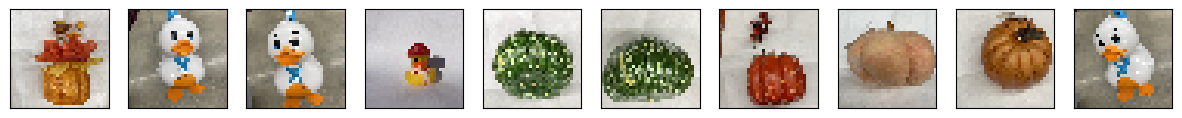

Reconstructions


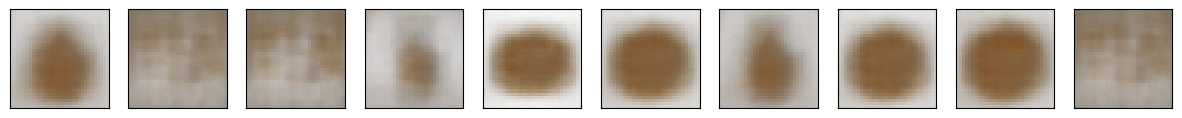

In [ ]:
print("Example real clothing items")
display(example_images)
print("Reconstructions")
display(predictions)

## 5. Embed using the encoder <a name="encode"></a>

In [ ]:
# Encode the example images
embeddings = encoder.predict(example_images)

3/3 [==============================] - 0s 7ms/step


In [ ]:
# Some examples of the embeddings
print(embeddings[:10])

[[ 1.4923816  -3.6904886 ]
 [ 3.007886   -1.0611582 ]
 [ 3.0708048  -0.78934604]
 [ 3.4927957  -3.5306873 ]
 [-0.17431243 -4.8401265 ]
 [ 0.2094106  -3.6520255 ]
 [ 2.1846805  -3.5724108 ]
 [ 0.41114742 -3.7517223 ]
 [ 0.1956708  -3.0668917 ]
 [ 2.8861787  -0.98208517]]


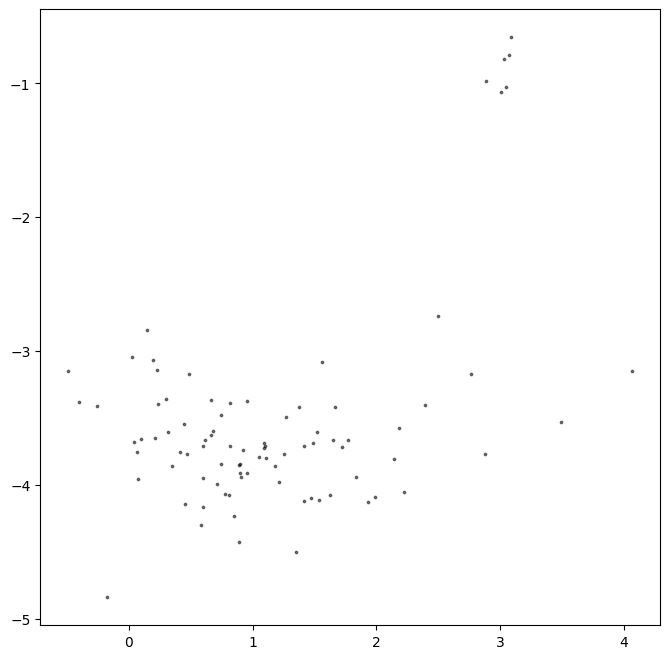

In [ ]:
# Show the encoded points in 2D space
figsize = 8

plt.figure(figsize=(figsize, figsize))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=3)
plt.show()

<ipython-input-156-b63b751df009>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


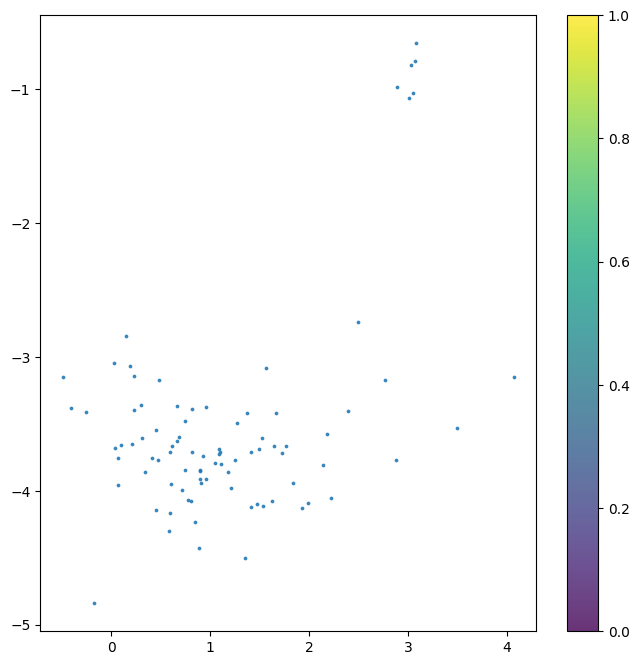

In [ ]:
# Colour the embeddings by their label (clothing type - see table)
example_labels = y_test[:n_to_predict]

figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    cmap="rainbow",
    # c=example_labels,
    alpha=0.8,
    s=3,
)
plt.colorbar()
plt.show()

## 6. Generate using the decoder <a name="decode"></a>

In [ ]:
# Get the range of the existing embeddings
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)

# Sample some points in the latent space
grid_width, grid_height = (6, 3)
sample = np.random.uniform(
    mins, maxs, size=(grid_width * grid_height, EMBEDDING_DIM)
)

In [ ]:
# Decode the sampled points
reconstructions = decoder.predict(sample)

1/1 [==============================] - 0s 135ms/step


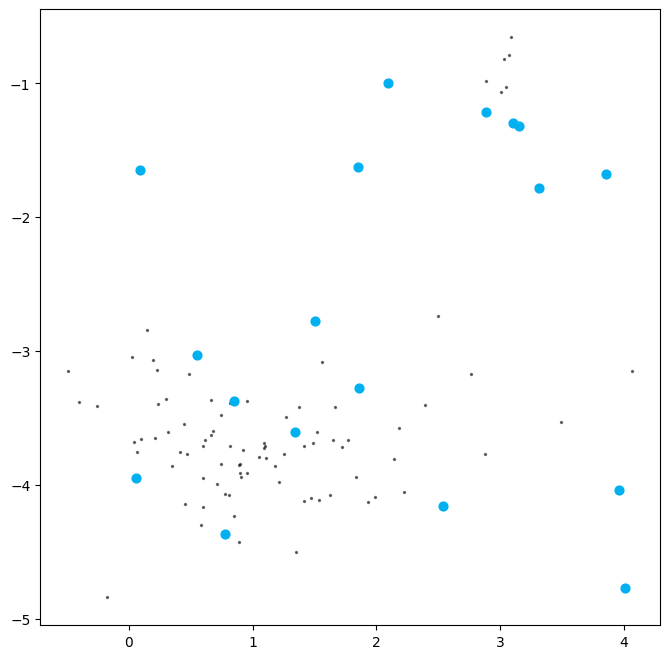

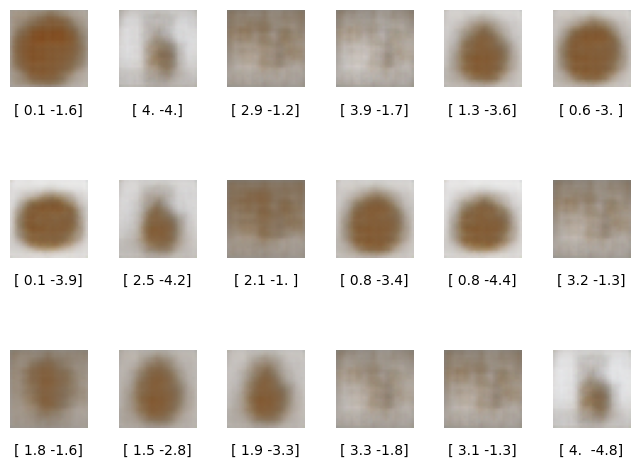

In [ ]:
# Draw a plot of...
figsize = 8
plt.figure(figsize=(figsize, figsize))

# ... the original embeddings ...
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=2)

# ... and the newly generated points in the latent space
plt.scatter(sample[:, 0], sample[:, 1], c="#00B0F0", alpha=1, s=40)
plt.show()

# Add underneath a grid of the decoded images
fig = plt.figure(figsize=(figsize, grid_height * 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        str(np.round(sample[i, :], 1)),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(reconstructions[i, :, :], cmap="Greys")

<ipython-input-155-954f24dda314>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


8/8 [==============================] - 1s 70ms/step


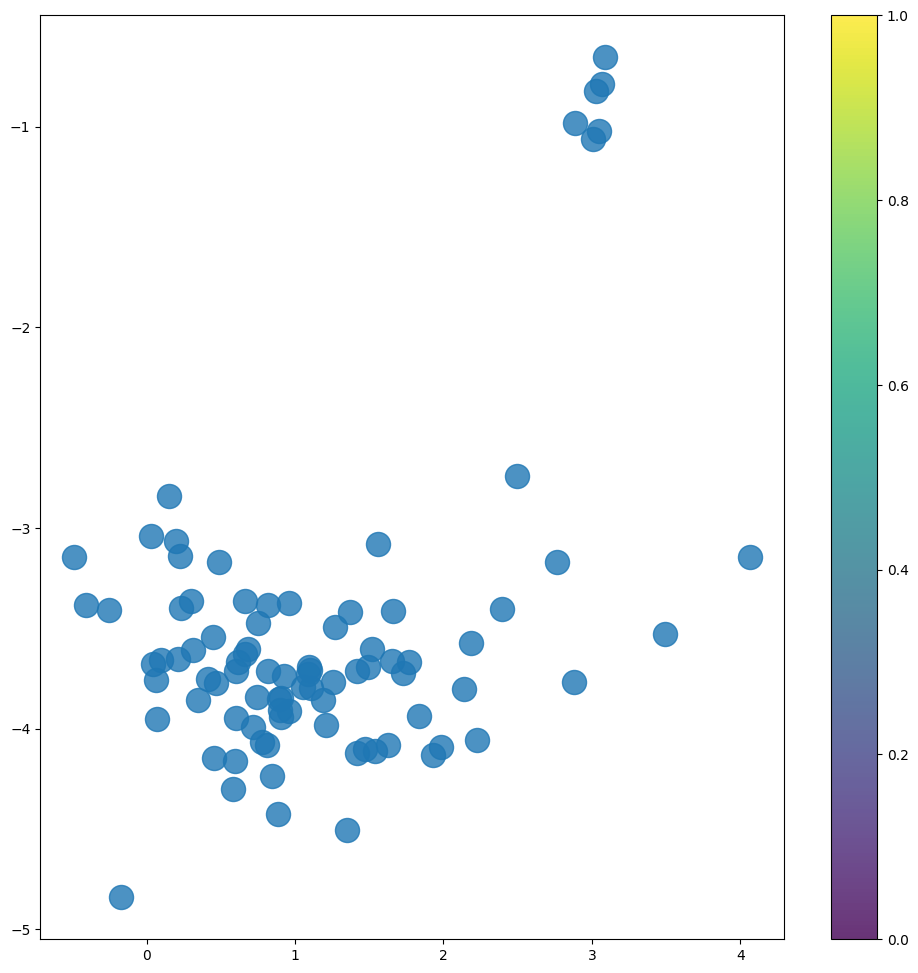

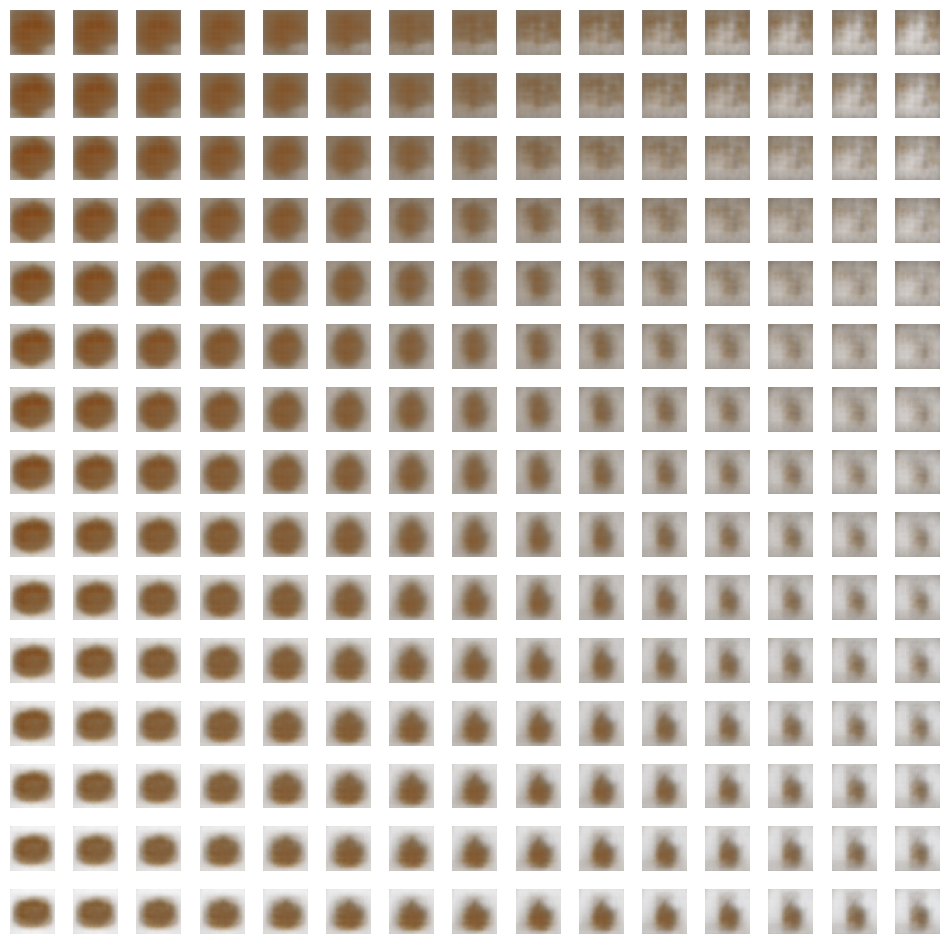

In [ ]:
# Colour the embeddings by their label (clothing type - see table)
figsize = 12
grid_size = 15
plt.figure(figsize=(figsize, figsize))
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    cmap="rainbow",
    # c=example_labels,
    alpha=0.8,
    s=300,
)
plt.colorbar()

x = np.linspace(min(embeddings[:, 0]), max(embeddings[:, 0]), grid_size)
y = np.linspace(max(embeddings[:, 1]), min(embeddings[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid)
# plt.scatter(grid[:, 0], grid[:, 1], c="black", alpha=1, s=10)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :], cmap="Greys")